In [2]:
import pandas as pd
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray
from PIL import Image, ImageOps

# Sound Processing

In [17]:
duration=30
fs=8000 
my_record=sd.rec(fs*duration,samplerate=fs,channels=1)
sd.wait()

In [18]:
type(my_record)

numpy.ndarray

In [19]:
my_record.shape

(240000, 1)

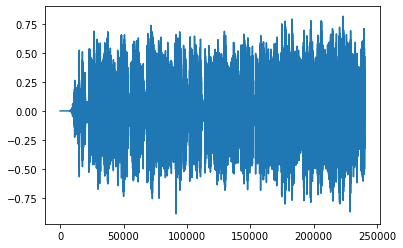

In [20]:
from matplotlib import pyplot as plt
plt.plot(my_record)

In [21]:
fs

8000

In [22]:
sd.play(my_record,fs)

play signal for 15sec

In [23]:
my_record1=my_record[:125000]

In [24]:
sd.play(my_record1,fs)

Sampling the voice signal

In [25]:
sd.play(my_record,4000)

In [26]:
sd.play(my_record,16000)

In [27]:
my_record2=my_record*60
sd.play(my_record2,8000)

a. 3*Speech signal
	b. 0.5*Speech signal
	c. exp(0.5*speech signal)
	d. ln(speech signal)
	e. Cos (Speech Signal)
	f. Speech signal + normal_random_noise of same length of speech signal


In [36]:
sd.play(my_record,24000)

In [29]:
sd.play(my_record,0.5*fs)

In [30]:
base=8000
exponent=0.5
exp=pow(base, exponent)
exp

89.44271909999159

In [ ]:
sd.play(my_record,89)

In [32]:
import math
ln=math.log(8000)

In [33]:
sd.play(my_record,0.5*fs)

In [34]:
cos=math.cos(8000)
cos

0.06564512751032302

In [ ]:
sd.play(my_record,0)

In [35]:
from scipy.io import wavfile

In [ ]:
fs 

In [37]:
duration=30
fs=8000  #44000Hhz
my_record4=sd.rec(fs*duration,samplerate=fs,channels=1)
sd.wait()

In [38]:
new_music=my_record+my_record4

In [39]:
sd.play(new_music,fs)

In [ ]:
plt.plot(new_music)

In [40]:
img = io.imread('cameraman.png')

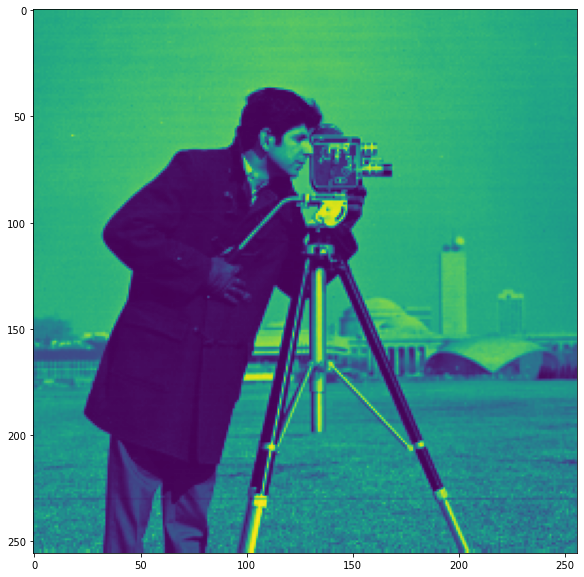

In [41]:
plt.figure( figsize = (10,10))
plt.imshow(img)

In [42]:
img.shape

(256, 256)

In [43]:
from PIL import Image, ImageFilter

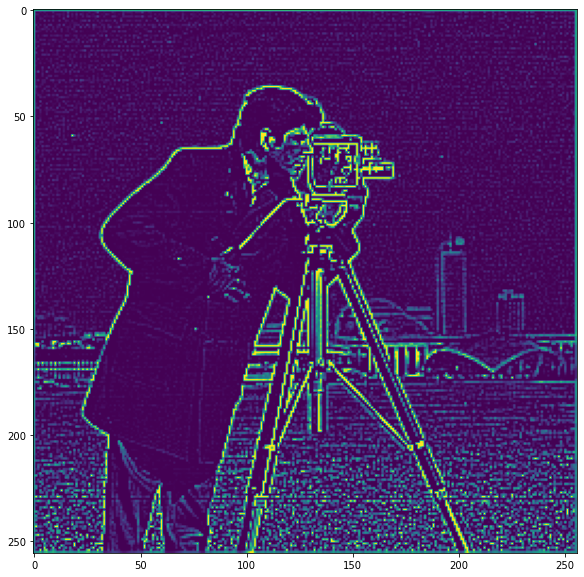

In [44]:
image = Image.open(r"cameraman.png")
 
image = image.convert("L")
 
image = image.filter(ImageFilter.FIND_EDGES)
plt.figure( figsize = (10,10))
plt.imshow(image)

# two pockets are showing in the edges of the image

# Image Processing

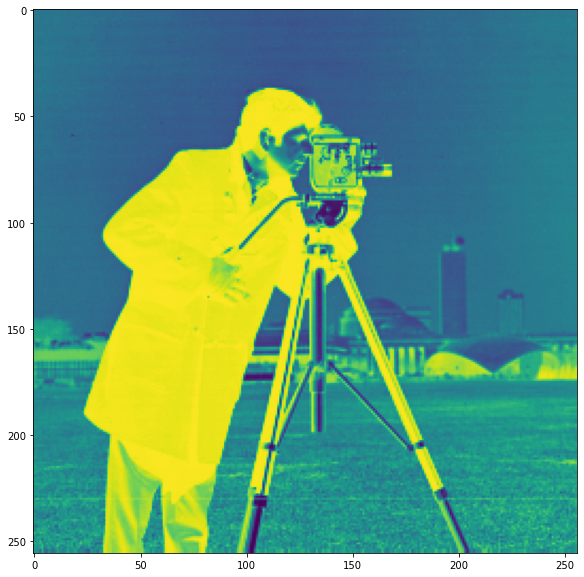

In [45]:
img_neg = 1 - img
plt.figure( figsize = (10,10))
plt.imshow(img_neg)
plt.show()

In [46]:
from PIL import ImageDraw
from PIL import ImageFont, ImageOps


In [47]:
colorImage  = Image.open("cameraman.png")

rotated     = colorImage.rotate(45)

transposed  = colorImage.transpose(Image.ROTATE_90)

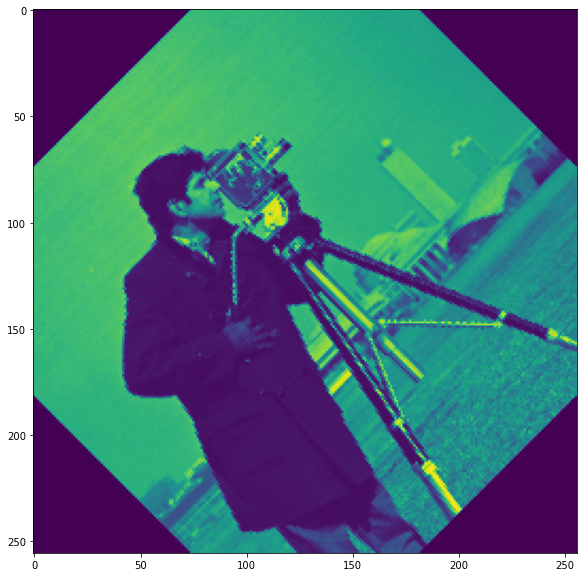

In [48]:
plt.figure( figsize = (10,10))
plt.imshow(rotated)
plt.show()

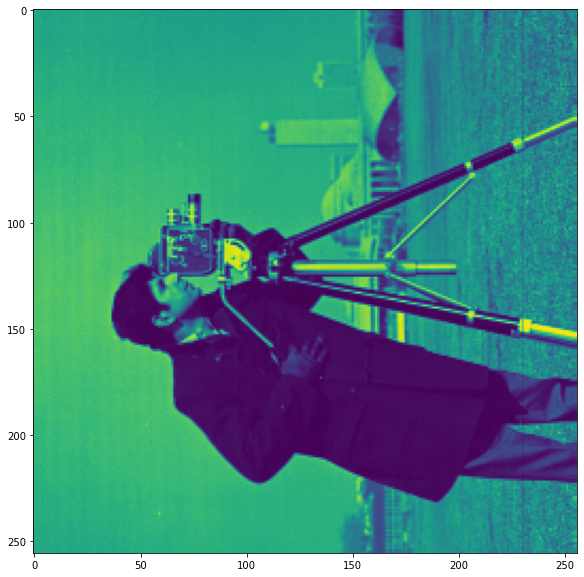

In [49]:
plt.figure( figsize = (10,10))
plt.imshow(transposed)
plt.show()

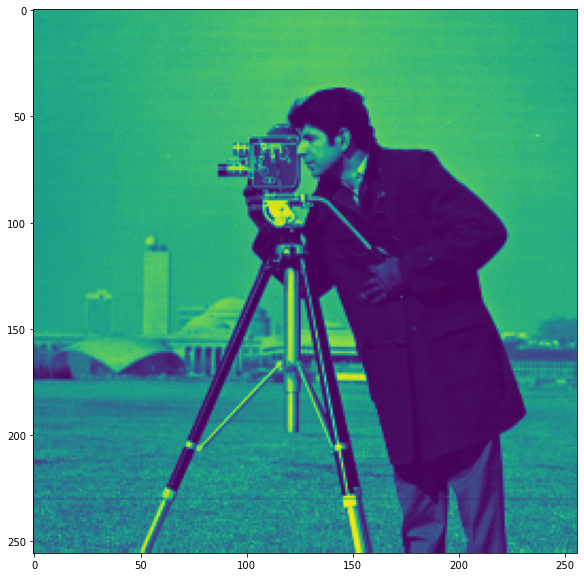

In [50]:
imageObject = Image.open("cameraman.png")
flippedImage = imageObject.transpose(Image.FLIP_LEFT_RIGHT)
plt.figure( figsize = (10,10))
plt.imshow(flippedImage)

Size of image before pyrUp:  (256, 256, 3)
Size of image after pyrUp:  (512, 512, 3)


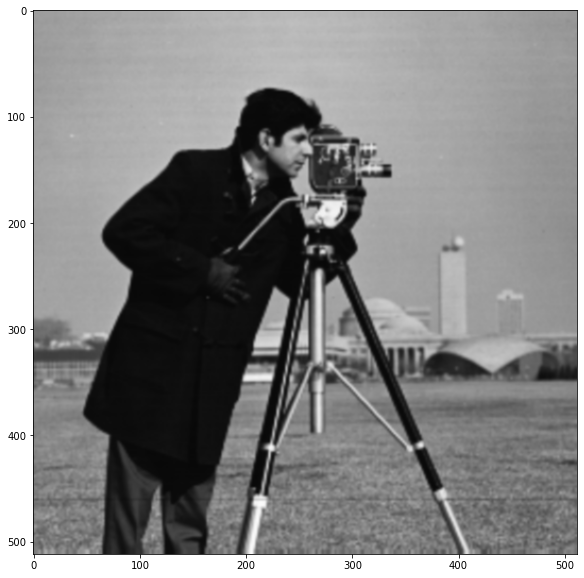

In [51]:
import cv2

image = cv2.imread('cameraman.png')
print("Size of image before pyrUp: ", image.shape)

image = cv2.pyrUp(image)
print("Size of image after pyrUp: ", image.shape)
cv2.imshow('UpSample', image)
plt.figure( figsize = (10,10))
plt.imshow(image)

In [4]:
df = pd.read_csv('Lung_feat.csv')
df.head()

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate,T
0,61.8750,12.00,32.077140,0.755673,449.71875,1.345392,1.000000,0.758333,2.339759,14.650000,...,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,15752872.0,368197.28130,19.111872,NON-CANCEROUS
1,14.0625,7.50,16.749615,0.629887,56.30625,1.615692,0.900000,0.693333,2.105107,7.850000,...,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,31347990.0,13273.56641,19.048378,NON-CANCEROUS
2,11.8125,15.75,13.560380,0.807250,127.96875,1.574249,0.333333,0.333333,3.415881,11.400000,...,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,30241724.0,11021.21387,19.080124,NON-CANCEROUS
3,20.2500,9.75,21.604931,0.545166,258.86250,1.529404,0.923077,0.494505,3.196538,15.316667,...,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9425374.0,22393.75195,19.111872,NON-CANCEROUS
4,13.5000,11.25,15.744046,0.684401,127.23750,1.334365,0.866667,0.693333,3.898952,13.400000,...,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,25179706.0,13486.62402,19.080124,NON-CANCEROUS


In [5]:
X1 = df.columns
len(X1)

24

In [6]:
X1

Index(['Area', 'diameter', 'perimeter', 'circularity', 'homogeneity',
       'compactness', 'homogeneity.1', '3d bounding box dim rate',
       'compactness2', 'clbp mean', 'euler point',
       'x-y projection compactness', 'min value inside', 'DC constant',
       'energy', 'skew inside', 'kurtosis inside', 'moment 2', 'MIP',
       'moment 5', 'moment 6', 'moment 7', 'x-y plane bb rate', 'T'],
      dtype='object')

In [7]:
X = df[df.columns[0:-1]]

In [8]:
X.head()

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,DC constant,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate
0,61.8750,12.00,32.077140,0.755673,449.71875,1.345392,1.000000,0.758333,2.339759,14.650000,...,1.001611,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,15752872.0,368197.28130,19.111872
1,14.0625,7.50,16.749615,0.629887,56.30625,1.615692,0.900000,0.693333,2.105107,7.850000,...,1.002350,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,31347990.0,13273.56641,19.048378
2,11.8125,15.75,13.560380,0.807250,127.96875,1.574249,0.333333,0.333333,3.415881,11.400000,...,1.002419,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,30241724.0,11021.21387,19.080124
3,20.2500,9.75,21.604931,0.545166,258.86250,1.529404,0.923077,0.494505,3.196538,15.316667,...,1.002237,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9425374.0,22393.75195,19.111872
4,13.5000,11.25,15.744046,0.684401,127.23750,1.334365,0.866667,0.693333,3.898952,13.400000,...,0.980073,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,25179706.0,13486.62402,19.080124


In [17]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [14]:
V = cov(X.T)
print(V)

[[ 4.74124164e+02  3.81347900e+01  1.69666614e+02  3.84082770e-01
   4.24260902e+03  2.06666409e+00  1.46033597e+00  1.02079686e+00
   1.22868860e-02  5.89910415e+01  5.74401772e+00  1.02345202e+00
   1.85373561e+01  1.10378009e+00  6.81525237e+00 -2.79994030e+00
   4.56324018e+00 -1.19758854e+02  1.57200828e+02 -5.88691389e+04
  -3.37023436e+07  3.58029437e+06  1.88326721e+01]
 [ 3.81347900e+01  2.29226548e+01  1.76577859e+01  3.09340578e-01
   5.40297915e+02  8.45661006e-01  1.00978333e-02  8.47758071e-02
   4.20310395e+00  2.01341792e+01  8.02338124e-01 -1.26912633e-01
   3.84906648e+00  4.36971116e-01  5.66096135e-01 -1.15726549e-01
   8.93142771e-01  8.11078769e+01  7.73984609e+01  1.41709869e+04
   2.86889351e+06  2.25695574e+05  3.76875721e+00]
 [ 1.69666614e+02  1.76577859e+01  7.89079458e+01 -1.23711696e-01
   1.44341995e+03  1.32581724e+00  8.11718131e-01  4.65141875e-01
   3.82868200e+00  3.02763966e+01  2.02114593e+00  3.50210896e-01
   1.22684236e+01  7.23222322e-01  3.825

<AxesSubplot:>

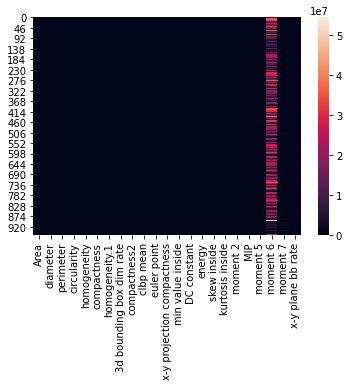

In [15]:
import seaborn as sns
sns.heatmap(X)

In [20]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
data_pca = pca.transform(X)
var = pca.explained_variance_ratio_
len(var)

23

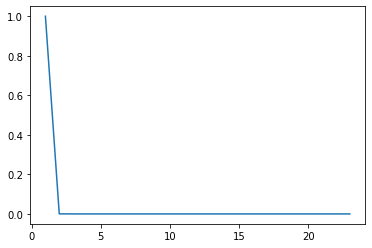

In [23]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
data_pca = pca.transform(X)
var = pca.explained_variance_ratio_
plt.plot(np.arange(1,X.shape[1]+1),var)
plt.show()

In [25]:
pca = PCA(n_components=2)
pca.fit(X)
data_pca = pca.transform(X)

In [26]:
pca.explained_variance_ratio_.sum()

0.999999596039997

In [27]:
V = cov(data_pca.T)
print(V)

[[1.16748521e+14 0.00000000e+00]
 [0.00000000e+00 3.19679839e+10]]


<AxesSubplot:>

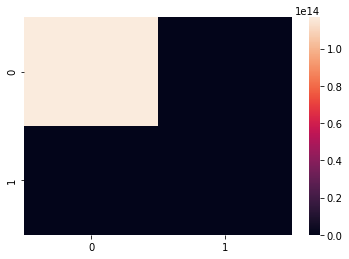

In [28]:
import seaborn as sns
sns.heatmap(V)

In [29]:
X_pca = pca.transform(X)

In [30]:
X_pca.shape

(955, 2)

In [31]:
pca.explained_variance_ratio_

array([9.99725852e-01, 2.73744110e-04])